In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
#Importing the data and seprating the features and dependent variables
#Feature = X, dependent variables = y
dataset = pd.read_excel('dates.xlsx')
X = dataset.iloc[:, 1:8]
y = dataset.iloc[:, -1]
print(X)



      year  month  day    DayName  max_avg_daily  min_avg_daily  avg_daily_tmp
0     2001      1    1     Monday           79.4           49.5           64.4
1     2001      1    2    Tuesday           79.4           49.5           64.4
2     2001      1    3  Wednesday           79.4           49.5           64.4
3     2001      1    4   Thursday           79.4           49.5           64.4
4     2001      1    5     Friday           79.4           49.5           64.4
...    ...    ...  ...        ...            ...            ...            ...
7665  2021     12   27     Monday           77.7           49.5           64.4
7666  2021     12   28    Tuesday           77.7           49.5           64.4
7667  2021     12   29  Wednesday           77.7           49.5           64.4
7668  2021     12   30   Thursday           77.7           49.5           64.4
7669  2021     12   31     Friday           77.7           49.5           64.4

[7670 rows x 7 columns]


In [5]:
#Encoding the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X)


[[ 0.   1.   0.  ... 79.4 49.5 64.4]
 [ 0.   0.   0.  ... 79.4 49.5 64.4]
 [ 0.   0.   0.  ... 79.4 49.5 64.4]
 ...
 [ 0.   0.   0.  ... 77.7 49.5 64.4]
 [ 0.   0.   0.  ... 77.7 49.5 64.4]
 [ 1.   0.   0.  ... 77.7 49.5 64.4]]


In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

In [10]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.1516340917354774
Mean Squared Error: 0.03394820906048685
R-squared: 0.01578796457102316


In [11]:
y_test_subset1 = y_test



In [12]:
y_pred_subset1 = y_pred[:20]
print(y_pred_subset1)

[1.21963553 1.19105013 1.22739758 1.27180421 1.21562822 1.21158998
 1.25731014 1.24020929 1.23642431 1.18489888 1.27437235 1.24999841
 1.23234513 1.23665959 1.20334645 1.25208845 1.21501804 1.25346659
 1.21407781 1.24427778]


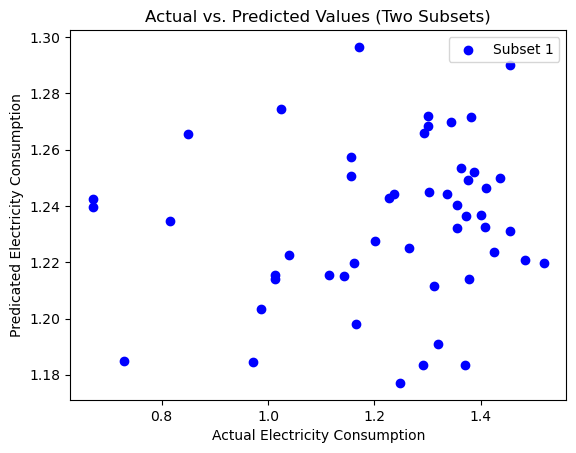

In [13]:
y_test_subset1 = y_test[:50]
y_pred_subset1 = y_pred[:50]
plt.scatter(y_test_subset1, y_pred_subset1, c='blue', label='Subset 1')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicated Electricity Consumption')
plt.title('Actual vs. Predicted Values (Two Subsets)')
plt.legend()
plt.show()
